In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# prompt: connect with drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Assignment(LR).csv')
df.head()

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


Text(0, 0.5, 'Price')

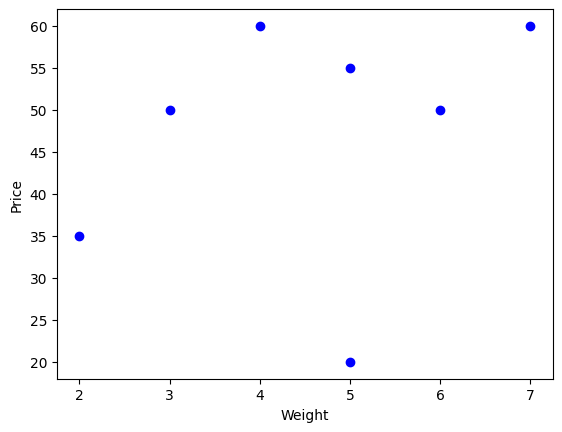

In [6]:
plt.scatter(df.Weight , df.Price, marker='o', color='blue')
plt.xlabel('Weight')
plt.ylabel('Price')

In [7]:
x = df.drop('Price', axis=1)
x.head()

,Weight
0,2
1,4
2,5
3,3
4,6


In [8]:
y = df.drop('Weight', axis=1)
y.head()

,Price
0,35
1,60
2,20
3,50
4,50


# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()



In [11]:
model.fit(x,y)

LinearRegression()

In [12]:
model.coef_

array([[2.62096774]])

In [13]:
model.intercept_

array([35.16129032])

In [19]:
model.predict([[5]])

array([[48.26612903]])

In [20]:
df['predicted'] = model.predict(x)
df.head()

,Weight,Price,predicted
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097


In [21]:
df['residuals']=df[['Price']]-model.predict(x)
df.head()

,Weight,Price,predicted,residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097


Text(0, 0.5, 'price')

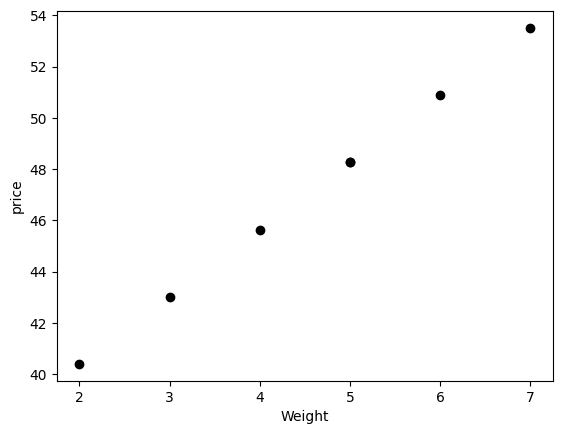

In [25]:
plt.scatter(df.Weight , df.predicted, marker='o', color='black')
plt.xlabel('Weight')
plt.ylabel('price')

Text(0, 0.5, 'Price')

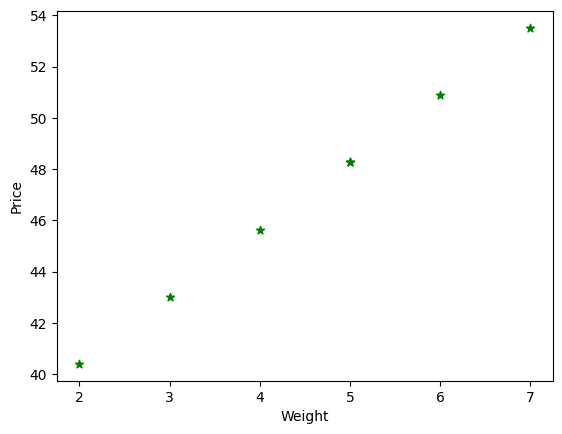

In [28]:
plt.scatter(df.Weight, df.predicted, marker='*', color='green')
plt.xlabel('Weight')
plt.ylabel('Price')

Text(0, 0.5, 'price')

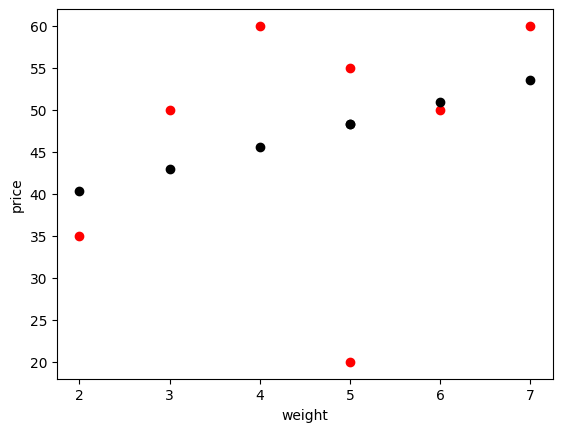

In [30]:
plt.scatter(df.Weight , df.Price, marker='o', color='red')
plt.scatter(df.Weight , df.predicted, marker='o', color='black')
plt.xlabel('weight')
plt.ylabel('price')

Text(0, 0.5, 'Price')

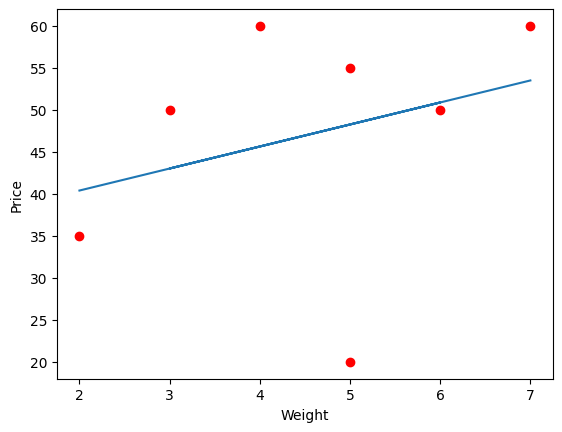

In [32]:
plt.scatter(df.Weight , df.Price, marker='o', color='red')
plt.plot(df.Weight, df.predicted)
plt.xlabel('Weight')
plt.ylabel('Price')

# MSE MAE`RMSE

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
mse = mean_squared_error(df['Price'] , df['predicted'])
mse

167.30990783410135

In [41]:
mean_absolute_error(df['Price'] , df['predicted'])

9.87327188940092

In [43]:
import math
math.sqrt(mse) #RMSE

12.934833119685052

# Manually Calculation

In [49]:
x = np.array([2,4,5,3,6,5,7])
y = np.array([35,60,20,50,50,55,60])
x



array([2, 4, 5, 3, 6, 5, 7])

In [50]:
y

array([35, 60, 20, 50, 50, 55, 60])

# Create Datarame

In [51]:
df = pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [55]:
X = df[['x']]
Y = df['y']

# **Using sklearn to perform linear regression**

In [56]:
model = LinearRegression().fit(X, Y) #training model


# Manual calculations using Formula 1

In [57]:
mean_x = np.mean(x)
mean_y = np.mean(y)
slope_formula = np.sum((x - mean_x) * (y - mean_y)) / np.sum((x - mean_x)**2)
intercept_formula = mean_y - slope_formula * mean_x

# Formula2

In [58]:

N = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x**2)

slope_formula2 = (N * sum_xy - sum_x * sum_y) / (N * sum_x2 - sum_x**2)
intercept_formula2 = (sum_y - slope_formula2 * sum_x) / N  # Corrected line


In [ ]:
# Let's Compare the Results

In [60]:
#formula1
(slope_formula, intercept_formula)

(2.620967741935484, 35.16129032258065)

In [61]:
#formula2
(slope_formula2, intercept_formula2)

(2.620967741935484, 35.16129032258065)

# Prediction

In [62]:
pred = model.predict(df[['x']])
pred

array([40.40322581, 45.64516129, 48.26612903, 43.02419355, 50.88709677,
       48.26612903, 53.50806452])

In [63]:
df.head()

,x,y
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [64]:

df['pred'] = model.predict(df[['x']])
df.head()

,x,y,pred
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097


Text(0.5, 1.0, 'Weight and Price ratio ')

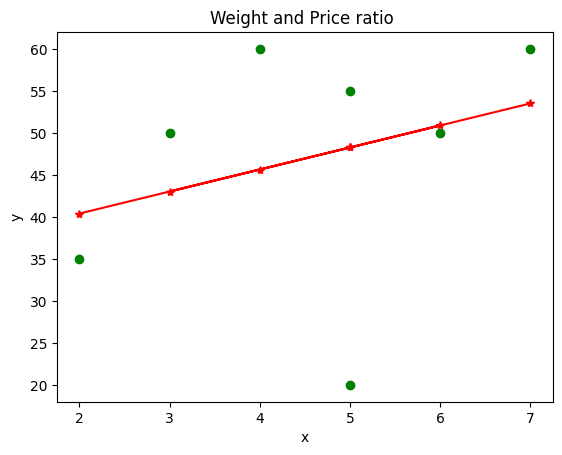

In [66]:
plt.plot(df[['x']], model.predict(df[['x']]), marker='*', color='red') #best fit line
plt.scatter(df['x'] , df['y'], color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Weight and Price ratio ')